In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataFolder = '../scrape/csv_files/'
station_occupancy = pd.read_csv(dataFolder + 'station_history_cumulative.csv', index_col=0)
station_occupancy.head()

,station_id,bikes,docks,Minute,Hour,Day,Month,Year,Day of Week
0,1,3,12,50,18,16,6,2018,5
1,2,9,6,50,18,16,6,2018,5
2,3,2,12,50,18,16,6,2018,5
3,4,14,5,50,18,16,6,2018,5
4,6,4,7,50,18,16,6,2018,5


In [7]:
station_names = pd.read_csv(dataFolder + 'station_names.csv')

idToName = dict()
for index, row in station_names.iterrows():
    idToName[row['station_id']] = row['name']

station_names.head()

,station_id,name,address,lat,lon,datetime
0,1,2nd & Congress,"151 E. 2nd St, Austin, TX 78701",30.26408,-97.74355,2018-10-31 09:30:00
1,2,4th & Congress,"120 W. 4th St., Austin, TX 78701",30.26634,-97.74378,2018-10-31 09:30:00
2,3,8th & Congress,"111 E. 8th St., Austin, TX 78701",30.26978,-97.74224,2018-10-31 09:30:00
3,4,City Hall / Lavaca & 2nd,"Presented by Graves Dougherty Hearon & Moody, ...",30.26476,-97.74678,2018-10-31 09:30:00
4,5,5th & Bowie,"Presented by Whole Foods Market, Austin, TX 78703",30.27001,-97.75308,2018-10-31 09:30:00


In [8]:
#Full, Empty
occupancy_dict = dict()
for identity in idToName:
    occupancy_dict[idToName[identity]] = [0, 0, 0]

for index, row in station_occupancy.iterrows():
    if row['docks'] == 0:
        occupancy_dict[idToName[row['station_id']]][0]+=1
        occupancy_dict[idToName[row['station_id']]][2]+=1
    if row['bikes'] == 0:
        occupancy_dict[idToName[row['station_id']]][1]+=1
        occupancy_dict[idToName[row['station_id']]][2]+=1

In [9]:
occupancy_df = pd.DataFrame(
        [[station, occupancy_dict[station][0], occupancy_dict[station][1], \
         occupancy_dict[station][2]] for station in occupancy_dict], 
        columns=['Name', 'Full', 'Empty', 'Either'])
occupancy_df.head()

,Name,Full,Empty,Either
0,East 6th at Robert Martinez,0,458,458
1,5th & Bowie,612,561,1173
2,Brazos & 6th,790,1300,2090
3,East 11th St. at Victory Grill,0,1240,1240
4,Trinity & 6th Street,1921,275,2196


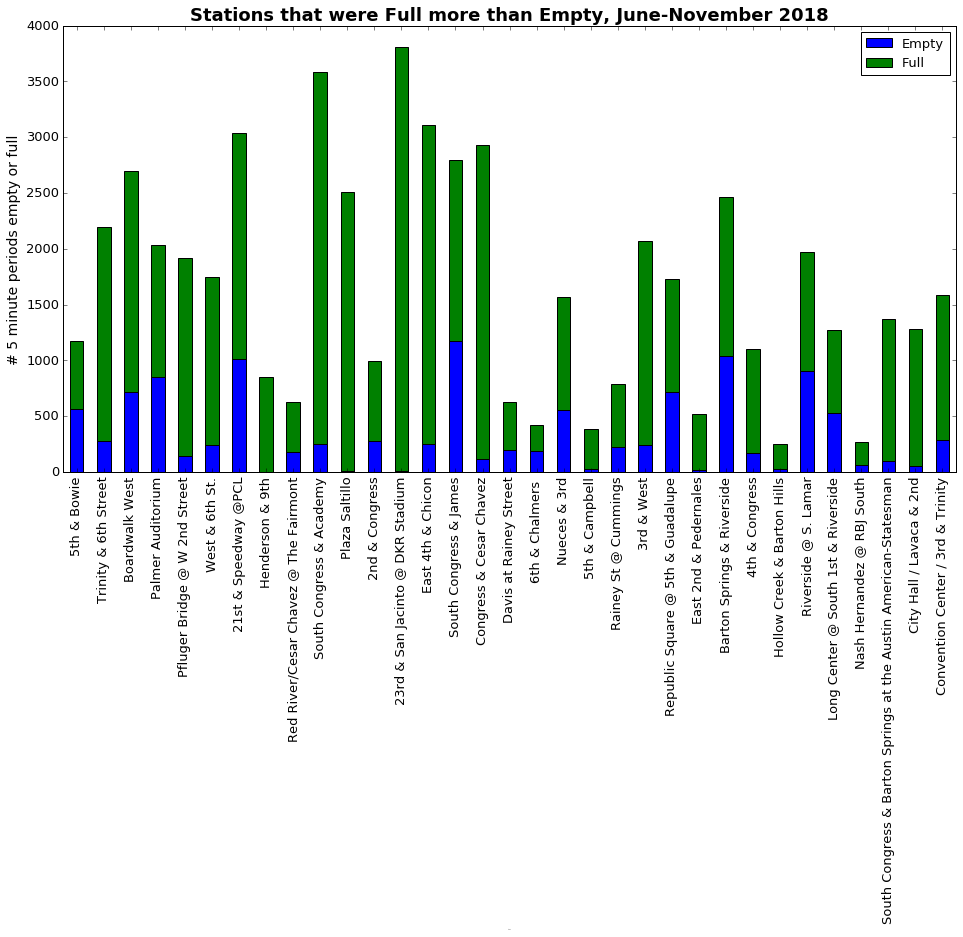

In [10]:
occupancy_df_full = occupancy_df[occupancy_df['Full'] > occupancy_df['Empty']]
ax1 = (occupancy_df_full
       .plot.bar(x='Name', y=['Empty', 'Full'], stacked=True, figsize=(16,8)))
ax1.set_xlabel('Station', fontsize=0)
ax1.set_ylabel('# 5 minute periods empty or full', fontsize=14)
ax1.set_title('Stations that were Full more than Empty, June-November 2018',  fontdict={'size' : 18, 'weight' : 'bold'})
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax1.legend(fontsize=13)
plt.show()

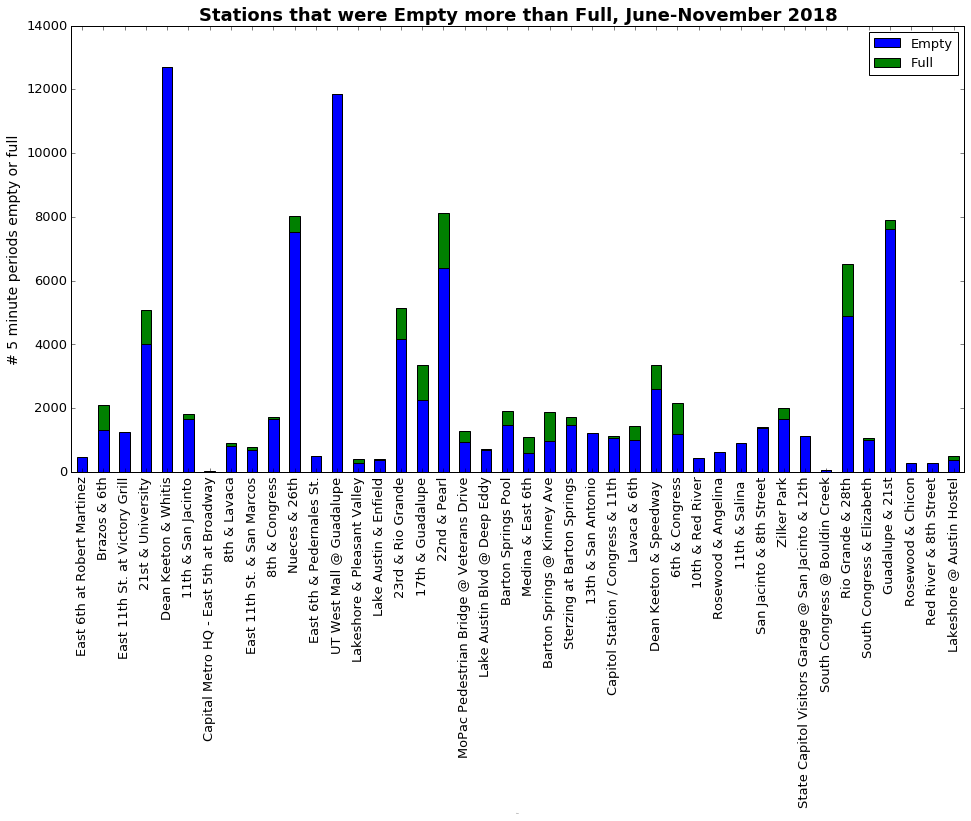

In [11]:
occupancy_df_empty = occupancy_df[occupancy_df['Full'] < occupancy_df['Empty']]
ax1 = (occupancy_df_empty
       .plot.bar(x='Name', y=['Empty', 'Full'], stacked=True, figsize=(16,8)))
ax1.set_xlabel('Station', fontsize=0)
ax1.set_ylabel('# 5 minute periods empty or full', fontsize=14)
ax1.set_title('Stations that were Empty more than Full, June-November 2018',  fontdict={'size' : 18, 'weight' : 'bold'})
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax1.legend(fontsize=13)
plt.show()

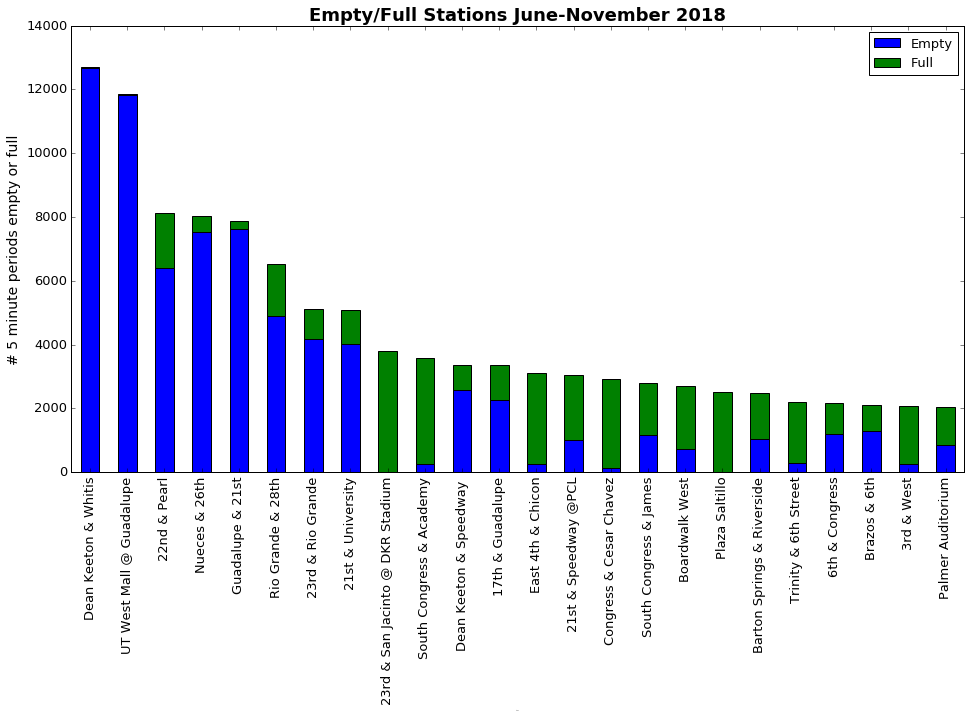

In [12]:
occupancy_df_important = occupancy_df[occupancy_df['Either'] >= 2000]
occupancy_df_important = occupancy_df_important.sort_values('Either', axis=0, ascending=False)
ax1 = (occupancy_df_important
       .plot.bar(x='Name', y=['Empty', 'Full'], stacked=True, figsize=(16,8)))
ax1.set_xlabel('Station', fontsize=0)
ax1.set_ylabel('# 5 minute periods empty or full', fontsize=14)
ax1.set_title('Empty/Full Stations June-November 2018',  fontdict={'size' : 18, 'weight' : 'bold'})
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax1.legend(fontsize=13)
plt.show()